# Bank Marketing (with social/economic context)

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable (_y_) marked 'yes', otherwise 'no'

Downloaded from https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset


In [252]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load Data

In [273]:
 df = pd.read_csv("../data/clean/bank-additional-full_cleaned.csv")

In [254]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [255]:
df.shape

(41176, 21)

In [256]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Feature Exploration

**Overal Statistic**

In [ ]:
for column in df.columns:
    print('Statistic for', column)
    print(df[column].describe())
    print('---------------------')

### 1. Proportion of the customers who made the deposit after the campaign and who don\'t.

In [274]:
#split the df
df_yes = df[df.y == 'yes']
df_no = df[df.y == 'no']

In [275]:
#count the values for 'yes' and 'no'
yes_count = df_yes.y.count()
no_count = df_no.y.count()

In [260]:
#create a new temporary df
data= {'YES_deposit': [yes_count], 'NO_deposit': [no_count]}
yes_no = pd.DataFrame(data, columns = ['YES_deposit', 'NO_deposit'])
yes_no

,YES_deposit,NO_deposit
0,4639,36537


In [261]:
#calcucalte few vars for the bar
percentage = (yes_count/df.shape[0]) * 100
efficiency = round(percentage, 1)
customers_involved  = df.shape[0]

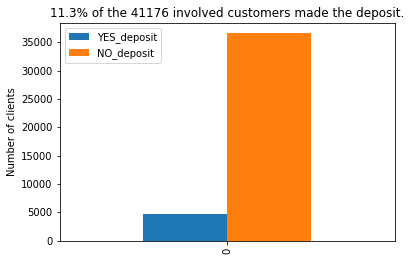

In [262]:
#plot a bar
yes_no.plot(kind="bar")
plt.title('{}% of the {} involved customers made the deposit.'.format(efficiency,customers_involved))
plt.ylabel('Number of clients')
plt.show();

### 2. Some customers which were involved in the current campaign were already contacted before. Does is has an impact on the deposit decision?

In [285]:
prev_contacts_yes = df_yes[df_yes.pdays!= 999].y.count()
prev_contacts_no = df_no[df_no.pdays!= 999].y.count()

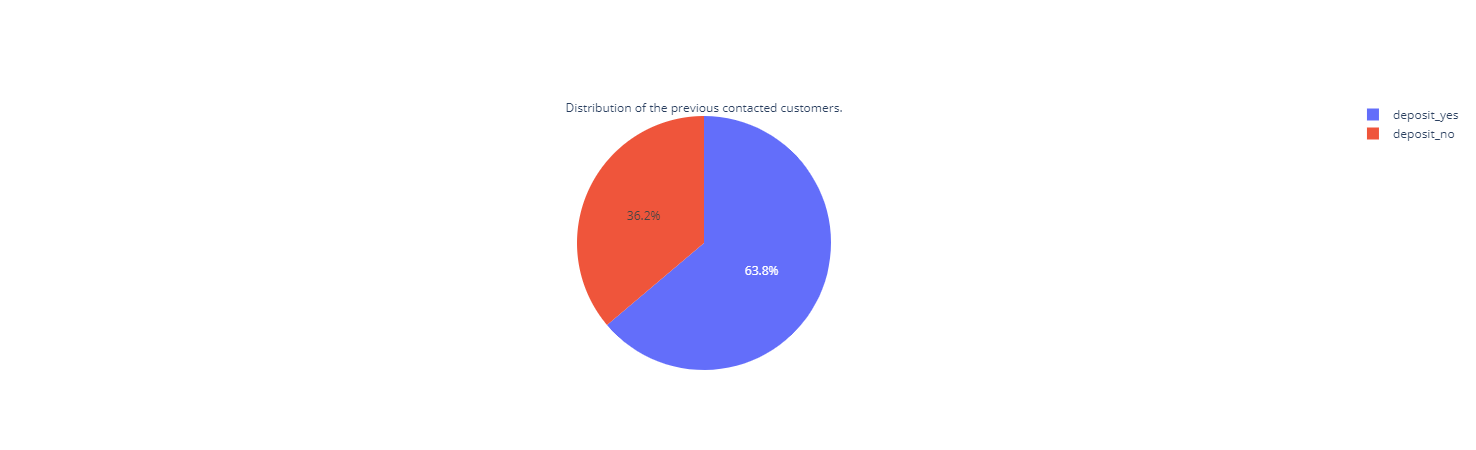

In [286]:
labels = ['deposit_yes', 'deposit_no']
values = [prev_contacts_yes,prev_contacts_no]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, title="Distribution of the previous contacted customers.")])
fig.show()

From the pie chart above we see that the number of the customers who previously contacted and made the deposit is significantly higher than the number of customers who didn't made the deposit. As a conclusion: there is a positiv impact on the deposit decision if customers werde contacted before.

In [ ]:
#fig = px.bar(data_frame=temp)
#fig.show()

In [269]:
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

First, we should split *previous contacts* into two groups: 
 - previous campaign
 - all previous contacts (obviously including the previous campaign
 

In [270]:
df.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [271]:
# Convert target variable into numeric (code used from the VolodymyrGavrysh accomplished Task)
#df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
#df.corr()